# Homework No. 4

The following jupyter notebook contains the results of the fourth homework for the course: "Data Visualization" and was created by Franz Just.

To execute the jupyter notebook, the following libraries are required to install:
- pandas
- seaborn
- matplotlib
- numpy

The dataset that is used was published by **Jack Daoud** on **Kaggle** and can be found through the following **URL:** https://www.kaggle.com/jackdaoud/marketing-data.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("dataset.csv", index_col = None)
df = df.drop(columns=['Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','AcceptedCmp3', 'AcceptedCmp2', 'AcceptedCmp1', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'])
df = df.rename(columns={" Income ": "Income"})
df2 = pd.melt(df[["NumCatalogPurchases","NumWebPurchases", "NumStorePurchases"]])

## 1. Customer Registrations per Month

The first Visualizations makes an error in the data selection obvious. The following chart represents the total amount of customer registrations per month. However, the timeframe which is used starts more or less in august 2012 until june 2013. By that, july appears just one time in 2013 and therefore, a big gap in the chart can be recognized.

In [3]:
# Error Data
df["Date"] = pd.to_datetime(df['Dt_Customer'])
df3 = df
df3.index = pd.to_datetime(df3['Date'],format='%m/%d/%y %I:%M%p')
dt = df3.groupby(by=[df3.index.month]).size()
dt = dt.to_frame().reset_index()
dt = dt.rename(columns={0: "count"})
dec = list(dt["count"])

# Data Corrected
df4 = df[(df['Date'] >= "2013-01-01") & (df['Date'] <= "2013-12-31")]
df4.index = pd.to_datetime(df4['Date'],format='%m/%d/%y %I:%M%p')
dt2 = df4.groupby(by=[df4.index.month]).size()
dt2 = dt2.to_frame().reset_index()
dt2 = dt2.rename(columns={0: "count"})
dec2 = list(dt2["count"])

In [4]:
months = list(calendar.month_name)
months.pop(0);

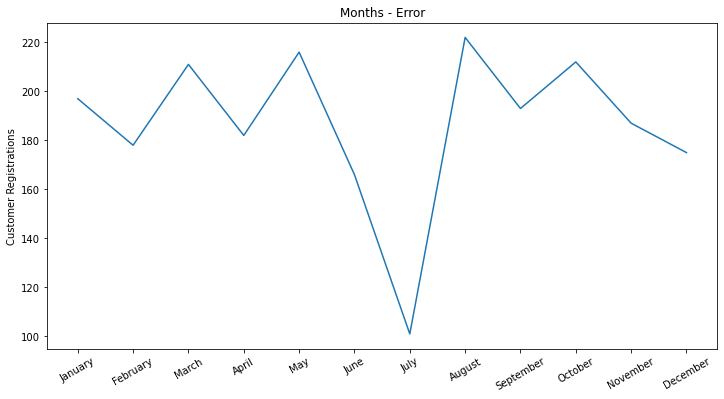

In [5]:
plt.figure(figsize = (12,6))
plt.xticks(rotation=30)
sns.lineplot(x = months, y = dec)
plt.title("Months - Error")
plt.ylabel("Customer Registrations");

To solve the problem, the data needs either to be normalized, or an equaly distributed timeframe needs to be selected. In the following chart, data of 2013 is presented.  

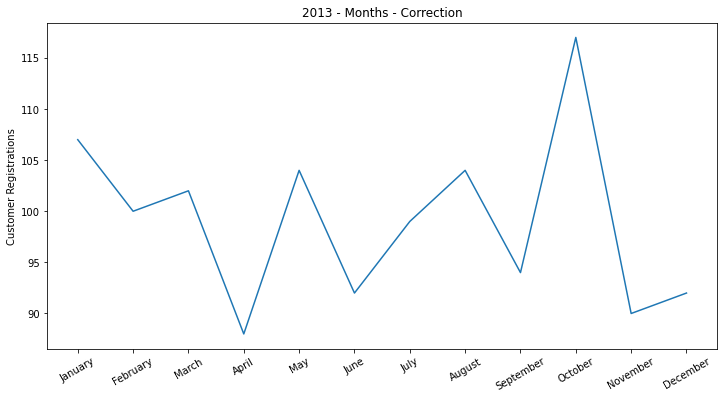

In [6]:
plt.figure(figsize = (12,6))
plt.xticks(rotation=30)
sns.lineplot(x = months, y = dec2)
plt.title("2013 - Months - Correction")
plt.ylabel("Customer Registrations");

## 2. Sale Channel Purchases

The second visualization presents a mistake in the data visualization, where too many decimal places are displayed.

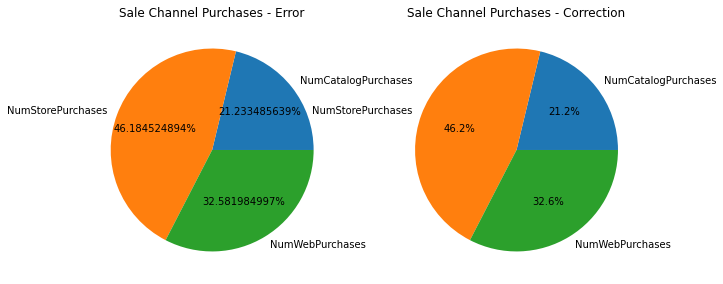

In [7]:
meanNumWebPurchases = np.mean(df.NumWebPurchases);
meanNumCatalogPurchases = np.mean(df.NumCatalogPurchases);
meanNumStorePurchases = np.mean(df.NumStorePurchases);
sumPurchases = meanNumWebPurchases + meanNumCatalogPurchases + meanNumStorePurchases

labels = ["NumCatalogPurchases", "NumStorePurchases", "NumWebPurchases"]

plt.figure(figsize=(10,20))
plt.subplot(1, 2, 1)
plt.title("Sale Channel Purchases - Error")
plt.pie([meanNumCatalogPurchases, meanNumStorePurchases, meanNumWebPurchases], labels = labels, autopct='%.9f%%')
plt.subplot(1,2,2)
plt.title("Sale Channel Purchases - Correction")
plt.pie([meanNumCatalogPurchases, meanNumStorePurchases, meanNumWebPurchases], labels = labels, autopct='%.1f%%');

## 3. Income Representation

The third visualization focuses on the distribution of the income, where it gets clear that by not having any income ranges, the visualization is useless. The pie chart does exactly that and visualizes the frequency of every single income. In the histogram, the problem is solved by creating income ranges.

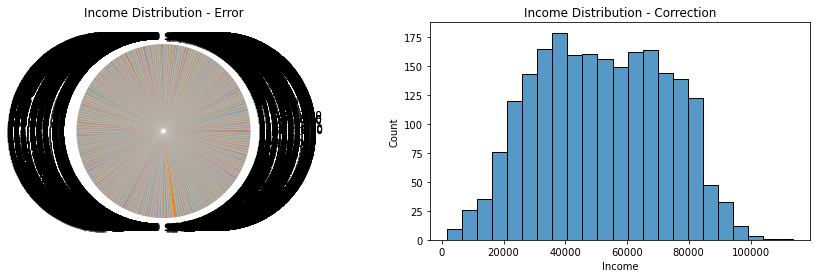

In [8]:
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title("Income Distribution - Error")
df_ewp = df.groupby('Income').size()
plt.pie(df_ewp, labels = df_ewp.keys().tolist());
plt.subplot(1,2,2)
df["Income"] = df["Income"].replace("[$,]", "", regex=True).astype(float)
Income = df["Income"].apply(lambda x: x if (x < 150000) else None)
plt.title("Income Distribution - Correction")
sns.histplot(Income);

## 4. Customer Registrations

For the fourth visualization, a wrong visualization was chosen to represent the amount of customers grouped per day 

In [9]:
dt = df4.groupby(by=[df4.index.day]).size()
dt = dt.to_frame().reset_index()
dt = dt.rename(columns={0: "count"})
dec = list(dt["count"])
da = list(dt.Date)

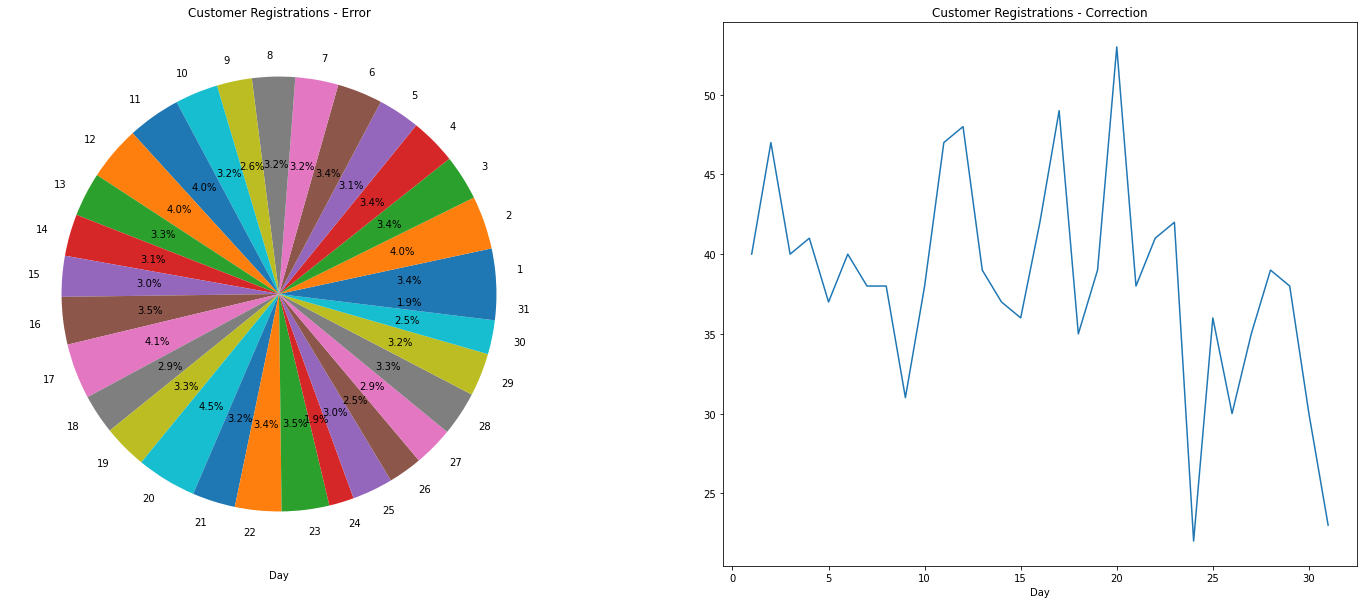

In [10]:
plt.figure(figsize=(25,10))
plt.subplot(1, 2, 1)
plt.title("Customer Registrations - Error")
plt.pie(dec, labels = da, autopct='%.1f%%');
plt.xlabel("Day");
plt.subplot(1,2,2)
plt.title("Customer Registrations - Correction")
sns.lineplot(x = da, y = dec)
plt.xlabel("Day");

## 5. Web Purchases Grouped by Education

In the fith visualization, important information about the axes as well as the data are missing.

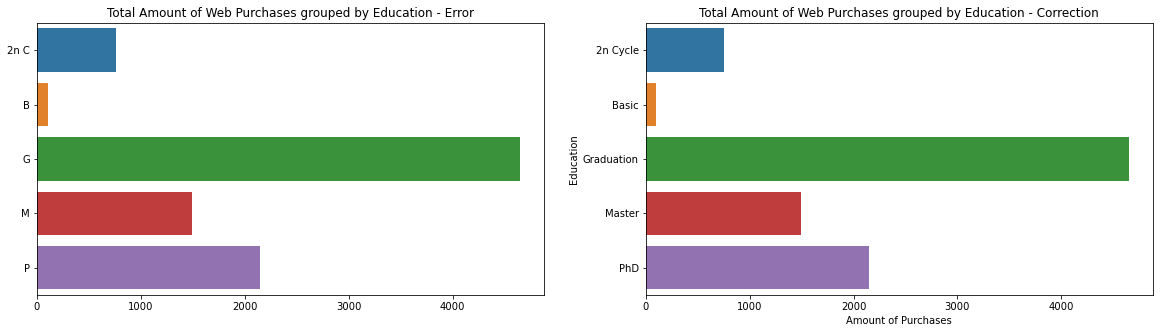

In [11]:
df_ewp = df.groupby('Education').sum()['NumWebPurchases']
df_ewp = df_ewp.reset_index()

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.title("Total Amount of Web Purchases grouped by Education - Error")
sns.barplot(x = df_ewp["NumWebPurchases"].values.tolist(), y = ["2n C", "B", "G", "M", "P"]);
plt.subplot(1,2,2)
plt.title("Total Amount of Web Purchases grouped by Education - Correction")
sns.barplot(x = df_ewp["NumWebPurchases"].values.tolist(), y = ["2n Cycle", "Basic", "Graduation", "Master", "PhD"]);
plt.xlabel("Amount of Purchases");
plt.ylabel("Education");

## 6. Customer Family Size

The sixth visualization gives missleading information about the distribution of the data, because the percent symbol is missing in the pie chart. 

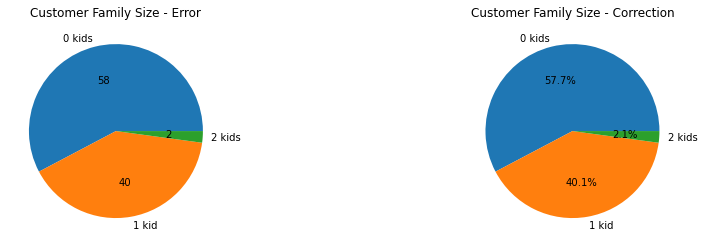

In [12]:
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
kids = df["Kidhome"].value_counts()
plt.title("Customer Family Size - Error")
plt.pie(kids, labels =["0 kids","1 kid","2 kids"], autopct='%.f');
plt.subplot(1,2,2)
plt.title("Customer Family Size - Correction")
plt.pie(kids, labels =["0 kids","1 kid","2 kids"], autopct='%.1f%%');

## 7. Web Purchases Grouped by the Country

The seventh visualization is an example for having not enough information. There is no need in visualizing one number. 

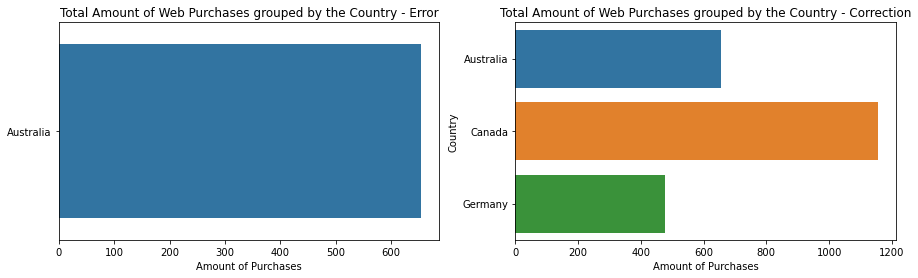

In [13]:
df_cwp = df.groupby('Country').sum()['NumWebPurchases']
df_cwp = df_cwp.reset_index()

da = [df_cwp["NumWebPurchases"][0]] * 2

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title("Total Amount of Web Purchases grouped by the Country - Error")
sns.barplot(x = da, y = ["Australia", "Australia"]);
plt.xlabel("Amount of Purchases");
plt.subplot(1,2,2)
plt.title("Total Amount of Web Purchases grouped by the Country - Correction")
sns.barplot(x = df_cwp["NumWebPurchases"].values.tolist()[:3], y = ["Australia", "Canada", "Germany"]);
plt.xlabel("Amount of Purchases");
plt.ylabel("Country");

## 8. Correlation Sale Channels

The eighth visualization is an example for a bad scaling, which makes it hard to compare both plots. 

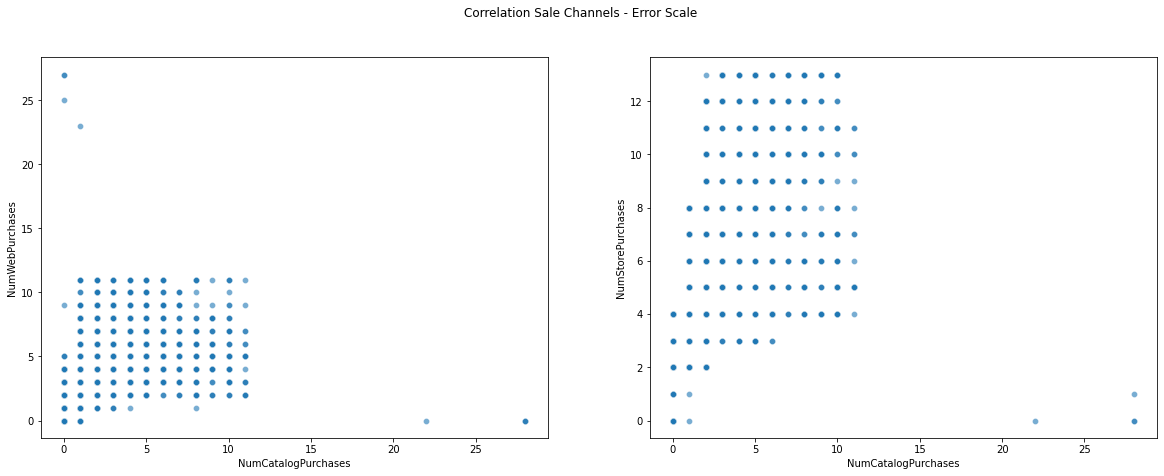

In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(20,7));
fig.suptitle('Correlation Sale Channels - Error Scale')
sns.scatterplot(data=df, x='NumCatalogPurchases', y='NumStorePurchases', ax=ax[1], alpha=0.6);
sns.scatterplot(data=df, x='NumCatalogPurchases', y='NumWebPurchases', ax=ax[0], alpha=0.6);

The following plots have the same scaling and by that allow it to easily compare them. 

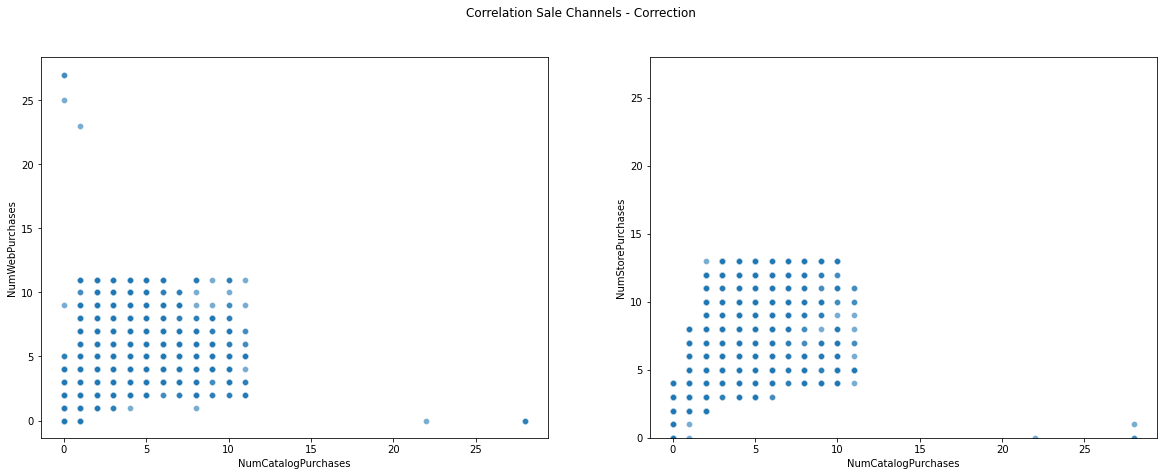

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=(20,7))
fig.suptitle('Correlation Sale Channels - Correction')
plt.ylim(0, 28)
sns.scatterplot(data=df, x='NumCatalogPurchases', y='NumStorePurchases', ax=ax[1], alpha=0.6);
sns.scatterplot(data=df, x='NumCatalogPurchases', y='NumWebPurchases', ax=ax[0], alpha=0.6);

## Source

[1] Jack Daoud; Marketing Analytics; https://www.kaggle.com/jackdaoud/marketing-data

-----------------------------------------------------------
Author: Franz Just